<a href="https://colab.research.google.com/github/KOMBOU12/Marius/blob/main/Introduction_par_Julie_Josse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Le but de ce projet est de faire tourner les codes présentés par Julie JOSSE avec d'autres jeux de données

**1-1 La méthode EM pour des données gaussiennes bivariées.**

L'objectif de ce problème est d'utiliser l'algorithme EM pour estimer la moyenne d'un ensemble de données normales bivariées comportant des valeurs manquantes dans l'une des deux variables. Nous générons  des données synthétiques différentes de Julie Josse, puis nous mettons en œuvre l'algorithme EM pour calculer l'estimateur de la moyenne.

In [ ]:
install.packages("norm")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(norm)
data(mdata)
pre <- prelim.norm(as.matrix(mdata))
thetahat <- em.norm(pre)

This package has some major limitations
(for example, it does not work reliably when
the number of variables exceeds 30),
and has been superseded by the norm2 package.



Iterations of EM: 
1...2...3...4...5...6...7...8...9...10...11...12...13...14...15...16...17...


In [ ]:
install.packages("mvtnorm")
library(mvtnorm)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Ce code génère des données bivariées normalement distribuées avec des valeurs manquantes à 30%.  

Le jeu de données comporte $ n $ échantillons contenant des valeurs manquantes uniquement dans la variable $ y_2$. En d'autres termes, pour un indice donné d'échantillons $ r \leq n $, pour $ i = 1, \ldots, r $, $ (y_{i1}, y_{i2}) $ sont complètement observés ; tandis que pour $ i = r + 1, \ldots, n $, nous n'observons que $ y_{i1} $. L'objectif est d'estimer la moyenne $ \mu $.

Nous comparerons deux stratégies :
1. Calcul direct de l'estimateur du maximum de vraisemblance.
2. Estimation avec l'algorithme EM.

In [ ]:
set.seed(100)

n <- 100
r <- floor(n*0.3)
mu <- c(2.22, -6.06)
# Sigma doit être symétrique
Sigma <- matrix(c(2.5, 0.4, 0.4, 0.9), nrow=2)  #

Y <- rmvnorm(n, mean=mu, sigma=Sigma)
missing_idx <- sample(100, r, replace = FALSE)
Y[missing_idx, 2] <- NA

On calcule les estimations du maximum de vraisemblance de $\mu_1$ et $\mu_2$

In [ ]:
hat_mu1_ML <- (1/n)*sum(Y[,1])
bar_y1 <- mean(Y[setdiff(1:n,missing_idx), 1]) # mean(Y[!((1:n)%in%missing_idx), 1])
bar_y2 <-mean(Y[setdiff(1:n,missing_idx), 2])
s_11 <- mean((Y[setdiff(1:n,missing_idx),1]-bar_y1)^2)
s_22 <- mean((Y[setdiff(1:n,missing_idx),2]-bar_y2)^2)
s_12 <- mean((Y[setdiff(1:n,missing_idx),1]-bar_y1)*(Y[setdiff(1:n,missing_idx),2]-bar_y2))
hat_beta_21.1 <- s_12/s_11
hat_beta_20.1 <- bar_y2-hat_beta_21.1*bar_y1
hat_mu2_ML <- hat_beta_20.1+hat_beta_21.1*hat_mu1_ML
resML <- c(hat_mu1_ML=hat_mu1_ML,hat_mu2_ML=hat_mu2_ML)

In [ ]:
Estep=function(Y, mu, Sigma, missing_idx)
{
n=nrow(Y)
sigma_22.1=Sigma[2,2]-Sigma[1,2]^2/Sigma[1,1]
beta_21.1=Sigma[1,2]/Sigma[1,1]
beta_20.1=mu[2]-beta_21.1*mu[1]

E_y2=rep(0, n)
E_y2[missing_idx]=rep(beta_20.1, length(missing_idx))+beta_21.1*Y[missing_idx,1]
E_y2[setdiff(1:n, missing_idx)]=Y[setdiff(1:n, missing_idx),2]
E_y1=Y[,1]
E_y2_y2=rep(0, n)
E_y2_y2[missing_idx]=E_y2[missing_idx]^2+rep(sigma_22.1, length(missing_idx))
E_y2_y2[setdiff(1:n, missing_idx)]=E_y2[setdiff(1:n, missing_idx)]^2
E_y1_y1=Y[,1]^2
E_y1_y2=rep(0, n)
E_y1_y2=E_y2*E_y1
return(structure(list(s1=sum(E_y1), s2=sum(E_y2), s11=sum(E_y1_y1), s22=sum(E_y2_y2), s12=sum(E_y1_y2))))
}

Mstep=function(Y, s1, s2, s11, s22, s12)
{
n=nrow(Y)
mu1=s1/n
mu2=s2/n
sigma1=s11/n-mu1^2
sigma2=s22/n-mu2^2
sigma12=s12/n-mu1*mu2
mu=c(mu1,mu2)
Sigma=matrix(c(sigma1, sigma12,sigma12,sigma2), nrow=2)
return(structure(list(mu=mu, Sigma=Sigma)))
}

On implémente une fonction  initEM

In [ ]:
initEM=function(Y, missing_idx)
{
n=nrow(Y)
r=n-length(missing_idx)
mu1=mean(Y[,1])
mu2=mean(Y[,2], na.rm=T)
sigma1=mean(Y[,1]^2)-mu1^2
sigma2=mean(Y[,2]^2, na.rm=T)-mu2^2
sigma12=mean(Y[,1]*Y[,2], na.rm=T)-mu1*mu2
mu=c(mu1,mu2)
Sigma=matrix(c(sigma1, sigma12,sigma12,sigma2), nrow=2)
return(structure(list(mu=mu, Sigma=Sigma)))
}

[1]  1.990499 -5.844650
[1]  1.990499 -5.846090
[1]  1.990499 -5.846753
[1]  1.990499 -5.847009
[1]  1.990499 -5.847101
[1]  1.990499 -5.847132
[1]  1.990499 -5.847142
[1]  1.990499 -5.847145
[1]  1.990499 -5.847147
[1]  1.990499 -5.847147
[1]  1.990499 -5.847147
[1]  1.990499 -5.847147
[1]  1.990499 -5.847147
[1]  1.990499 -5.847147
[1]  1.990499 -5.847147
[1]  1.990499 -5.847147
[1]  1.990499 -5.847147
[1]  1.990499 -5.847147
[1]  1.990499 -5.847147
[1]  1.990499 -5.847147
[1]  1.990499 -5.847147
[1]  1.990499 -5.847147
[1]  1.990499 -5.847147
[1]  1.990499 -5.847147
[1]  1.990499 -5.847147
[1]  1.990499 -5.847147
[1]  1.990499 -5.847147
[1]  1.990499 -5.847147
[1]  1.990499 -5.847147
[1]  1.990499 -5.847147
[1]  1.990499 -5.847147
[1]  1.990499 -5.847147
[1]  1.990499 -5.847147
[1]  1.990499 -5.847147
[1]  1.990499 -5.847147
[1]  1.990499 -5.847147
[1]  1.990499 -5.847147
[1]  1.990499 -5.847147
[1]  1.990499 -5.847147
[1]  1.990499 -5.847147
[1]  1.990499 -5.847147
[1]  1.990499 -5

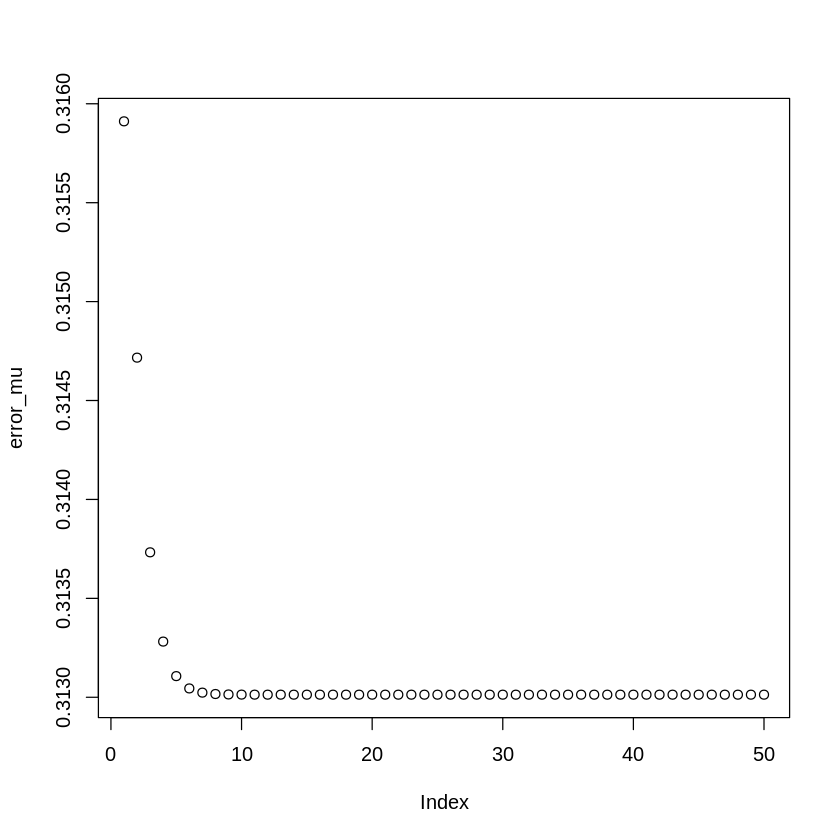

In [ ]:
init=initEM(Y, missing_idx)
hat_mu=init$mu
hat_Sigma=init$Sigma
error_mu=rep(0,50)
for(i in 1:50)
{
error_mu[i]=sqrt(sum((hat_mu-mu)^2))
# E step
E=Estep(Y, hat_mu, hat_Sigma, missing_idx)
s1=E$s1
s11=E$s11
s2=E$s2
s22=E$s22
s12=E$s12
M=Mstep(Y, s1, s2, s11, s22, s12)
hat_mu=M$mu
print(hat_mu)
hat_Sigma=M$Sigma
}
plot(error_mu)

On observe que l'erreur diminue rapidement lors des premières itérations, indiquant que l'algorithme converge vers une estimation précise de
μ. Après environ 10 itérations, l'erreur devient stable, suggérant que l'algorithme a atteint une convergence et que les estimations de
μ ne s'améliorent plus de manière significative. Cela montre une convergence rapide vers le maximum de vraisemblance pour les paramètres.

On vérifie que l'estimateur EM
μ est égal à l'estimateur du maximum de vraisemblance.

In [ ]:
resEM <- hat_mu
resEM
resML

[1]  1.990499 -5.847147

hat_mu1_ML hat_mu2_ML 
  1.990499  -5.847147

In [ ]:
init=initEM(Y, missing_idx)
hat_mu=init$mu
old_hat_mu = old_old_hat_mu = 0
hat_Sigma=init$Sigma
error_mu=rep(0,20)
for(i in 1:20)
{
old_old_hat_mu = old_hat_mu
old_hat_mu = hat_mu
# E step
E=Estep(Y, hat_mu, hat_Sigma, missing_idx)
s1=E$s1
s11=E$s11
s2=E$s2
s22=E$s22
s12=E$s12
M=Mstep(Y, s1, s2, s11, s22, s12)
hat_mu=M$mu
hat_Sigma=M$Sigma
if(i>=3){cat('Iteration=',i,", Convergence rate of mu2 =",(hat_mu-old_hat_mu)[2]/(old_hat_mu-old_old_hat_mu)[2],'\n')}
}
cat("Percentage of missingness is:", sum(is.na(Y[,2]))/dim(Y)[1])
# Pourcentage de valeurs manquantes

Iteration= 3 , Convergence rate of mu2 = 0.4597141 
Iteration= 4 , Convergence rate of mu2 = 0.3873336 
Iteration= 5 , Convergence rate of mu2 = 0.3568802 
Iteration= 6 , Convergence rate of mu2 = 0.3403751 
Iteration= 7 , Convergence rate of mu2 = 0.3301957 
Iteration= 8 , Convergence rate of mu2 = 0.3234102 
Iteration= 9 , Convergence rate of mu2 = 0.3186497 
Iteration= 10 , Convergence rate of mu2 = 0.315189 
Iteration= 11 , Convergence rate of mu2 = 0.3126076 
Iteration= 12 , Convergence rate of mu2 = 0.3106447 
Iteration= 13 , Convergence rate of mu2 = 0.3091304 
Iteration= 14 , Convergence rate of mu2 = 0.307949 
Iteration= 15 , Convergence rate of mu2 = 0.3070192 
Iteration= 16 , Convergence rate of mu2 = 0.3062832 
Iteration= 17 , Convergence rate of mu2 = 0.3056946 
Iteration= 18 , Convergence rate of mu2 = 0.3052214 
Iteration= 19 , Convergence rate of mu2 = 0.304882 
Iteration= 20 , Convergence rate of mu2 = 0.3045674 
Percentage of missingness is: 0.3

Si les données ne sont pas MAR, mais MNAR, il existe un biais dans les estimateurs, et il est donc nécessaire de spécifier un modèle pour les valeurs manquantes.

**Définition :**

*   **MAR (Missing At Random)** signifie que les valeurs manquantes dépendent d’autres variables observées mais pas de la variable elle-même. Par exemple, dans un sondage, les personnes plus âgées peuvent omettre de répondre à des questions sur les réseaux sociaux, mais cette absence dépend de l'âge, qui est observable.
*   **MNAR (Missing Not At Random)** signifie que les valeurs manquantes dépendent de la variable elle-même ou d’autres variables non observées. Par exemple dans les études de santé où les patients atteints de maladies graves peuvent être plus susceptibles de manquer des visites de suivi en raison de la gravité de leur état. Dans ce cas, l'absence de données (les visites manquées) est liée à la gravité de la maladie elle-même, qui est précisément l'information manquante. Ici, les données manquantes ne sont pas aléatoires et reflètent un biais dans l’échantillonnage en fonction de l’état de santé du patient.
*   **MCAR (Missing Completely At Random)** désigne un mécanisme de valeurs manquantes dans lequel les absences de données ne sont liées ni aux valeurs observées ni aux valeurs manquantes elles-mêmes. Autrement dit, les données manquent de façon entièrement aléatoire, sans aucune corrélation avec d'autres variables ou avec les valeurs des données manquantes. Dans un contexte MCAR, les estimations statistiques sont non biaisées, et les analyses sont fiables sans ajustement spécial pour les valeurs manquantes.





Le code génère des données bivariées (deux variables) à partir d'une distribution normale multivariée, puis introduit des valeurs manquantes dans la deuxième variable selon deux mécanismes différents : MAR (Missing At Random) et MNAR (Missing Not At Random). **On a implémente avec un jeu de données diffrérent de Julie JOSSE**

In [ ]:
set.seed(100)

n <- 100
r <- floor(n*0.3)
mu <- c(2.22, -6.06)
# Sigma doit être symétrique
Sigma <- matrix(c(2.5, 0.4, 0.4, 0.9), nrow=2)
Y <- rmvnorm(n, mean=mu, sigma=Sigma)

missing_idx_MAR <-sample(100, r, replace = FALSE)
Y1 <- Y
Y1[missing_idx_MAR, 2] <- NA

missing_idx_MNAR <-which(Y[,2]>sort(Y[,2],decreasing=TRUE)[r+1])
Y2 <- Y
Y2[missing_idx_MNAR, 2] <- NA

In [ ]:
init1=initEM(Y1, missing_idx_MAR)
hat_mu_MAR=init1$mu
hat_Sigma_MAR=init1$Sigma
init2=initEM(Y2, missing_idx_MNAR)
hat_mu_MNAR=init2$mu
hat_Sigma_MNAR=init2$Sigma

#MAR
init1=initEM(Y1, missing_idx_MAR)
hat_mu_MAR=init1$mu
hat_Sigma_MAR=init1$Sigma
error_mu=rep(0,50)
for(i in 1:50)
{
error_mu[i]=sqrt(sum((hat_mu_MAR-mu)^2))
# E step
E=Estep(Y, hat_mu_MAR, hat_Sigma_MAR, missing_idx_MAR)
s1=E$s1
s11=E$s11
s2=E$s2
s22=E$s22
s12=E$s12
M=Mstep(Y, s1, s2, s11, s22, s12)
hat_mu_MAR=M$mu
hat_Sigma_MAR=M$Sigma
}

#MNAR
init2=initEM(Y1, missing_idx_MNAR)
hat_mu_MAR=init2$mu
hat_Sigma_MAR=init2$Sigma
error_mu=rep(0,50)
for(i in 1:50)
{
error_mu[i]=sqrt(sum((hat_mu_MNAR-mu)^2))
# E step
E=Estep(Y, hat_mu_MNAR, hat_Sigma_MNAR, missing_idx_MNAR)
s1=E$s1
s11=E$s11
s2=E$s2
s22=E$s22
s12=E$s12
M=Mstep(Y, s1, s2, s11, s22, s12)
hat_mu_MNAR=M$mu
hat_Sigma_MNAR=M$Sigma
}

print(hat_mu_MAR)
print(hat_mu_MNAR)
print(hat_Sigma_MAR)
print(hat_Sigma_MNAR)

[1]  1.990499 -5.842908
[1]  1.990499 -6.355156
          [,1]      [,2]
[1,] 1.5922978 0.1676295
[2,] 0.1676295 0.7900182
          [,1]      [,2]
[1,] 1.5922978 0.2093514
[2,] 0.2093514 0.4251123


*hat_mu_MAR* et *hat_mu_MNAR* sont proches mais légèrement différents, indiquant une influence du mécanisme de manque (MAR vs. MNAR).
*hat_Sigma_MAR* et *hat_Sigma_MNAR* montrent que la structure de covariance est affectée par les valeurs manquantes MNAR, les valeurs étant plus biaisées pour MNAR.

Le code montre donc que les estimations des paramètres diffèrent en fonction de **la nature des données manquantes**, le biais étant plus marqué pour le cas MNAR

**1-2 EM pour la régression logistique avec des valeurs manquantes**

In [ ]:
install.packages("devtools")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Je n'ai pas fait cette partie car je ne réussi pas à installer et à faire tourner cette librairie  **install_github("wjiang94/misaem", force = TRUE)**

In [ ]:
library(devtools)
install_github("wjiang94/misaem", force = TRUE)

Loading required package: usethis




withr     (3.0.1 -> 3.0.2      ) [CRAN]
numDeriv  (NA    -> 2016.8-1.1 ) [CRAN]
ucminf    (NA    -> 1.2.2      ) [CRAN]
RcppEigen (NA    -> 0.3.4.0.2  ) [CRAN]
nloptr    (NA    -> 2.1.1      ) [CRAN]
minqa     (NA    -> 1.2.8      ) [CRAN]
ordinal   (NA    -> 2023.12-4.1) [CRAN]
lme4      (NA    -> 1.1-35.5   ) [CRAN]
jomo      (NA    -> 2.7-6      ) [CRAN]
pan       (NA    -> 1.9        ) [CRAN]
iterators (NA    -> 1.0.14     ) [CRAN]
shape     (NA    -> 1.4.6.1    ) [CRAN]
foreach   (NA    -> 1.5.2      ) [CRAN]
mitml     (NA    -> 0.4-5      ) [CRAN]
glmnet    (NA    -> 4.1-8      ) [CRAN]
mice      (NA    -> 3.16.0     ) [CRAN]


Installing 16 packages: withr, numDeriv, ucminf, RcppEigen, nloptr, minqa, ordinal, lme4, jomo, pan, iterators, shape, foreach, mitml, glmnet, mice

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/Rtmpd9MNjK/remotes267292a6d1c/wjiang94-misaem-de3dc16/DESCRIPTION’ ... OK
* preparing ‘misaem’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
Omitted ‘LazyData’ from DESCRIPTION
* building ‘misaem_1.0.0.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




**2- Imputation simple avec les moyennes ou avec la régression - cas bivarié.**

 On a modifié  **la moyenne et la matrice de variance-covariance** des données originales pour avoir un jeu de donnée différent. On a un jeu de données bivarié en utilisant une distribution normale multivariée avec une matrice de covariance spécifiée.

In [ ]:
library(mvtnorm)
n <- 100
sigma <- matrix(c(500, 200,200, 450), ncol=2)
don <- rmvnorm(n, mean = c(150, 100), sigma = sigma)

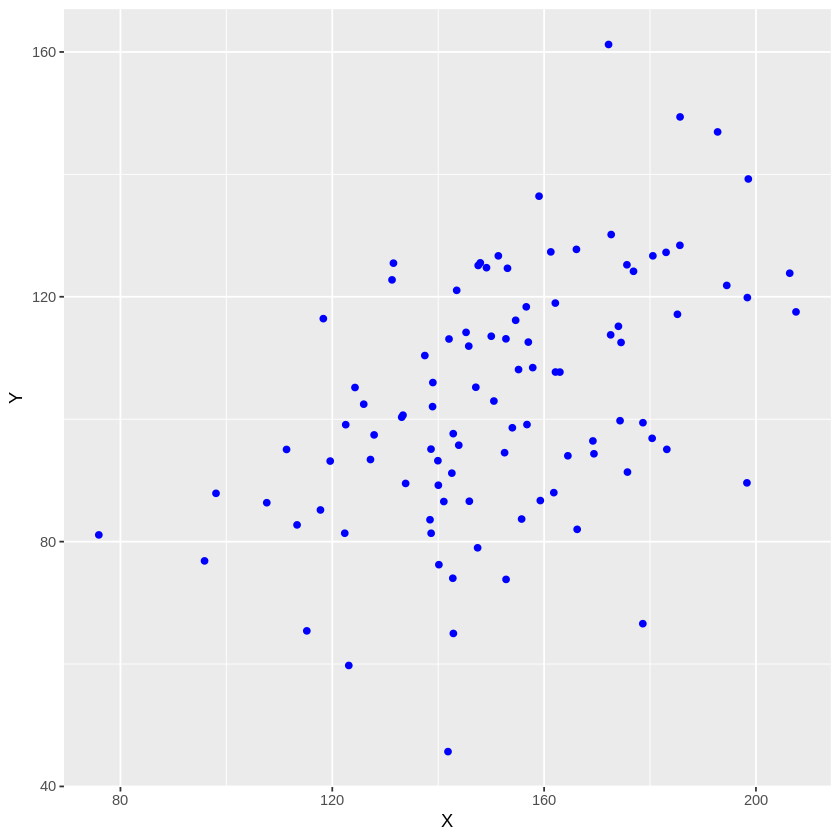

In [ ]:
colnames(don) <- c("X","Y")
don <- as.data.frame(don)
library(ggplot2)
ggplot(don) + aes(x=X, y=Y) + geom_point(colour="blue")

On introduit 73% de données manquantes (MCAR) sur une variables y.



In [ ]:
# Introduction des valeurs manquantes dans une colonne spécifique du jeu de données
donmiss <- don
indNA <- sample(1:n, 0.73*n)
donmiss[indNA, 2] <- NA

Imputation par la **méthode des moyennes**: Ensuite, on remplit (impute) ces valeurs manquantes par la moyenne de la colonne "Y"

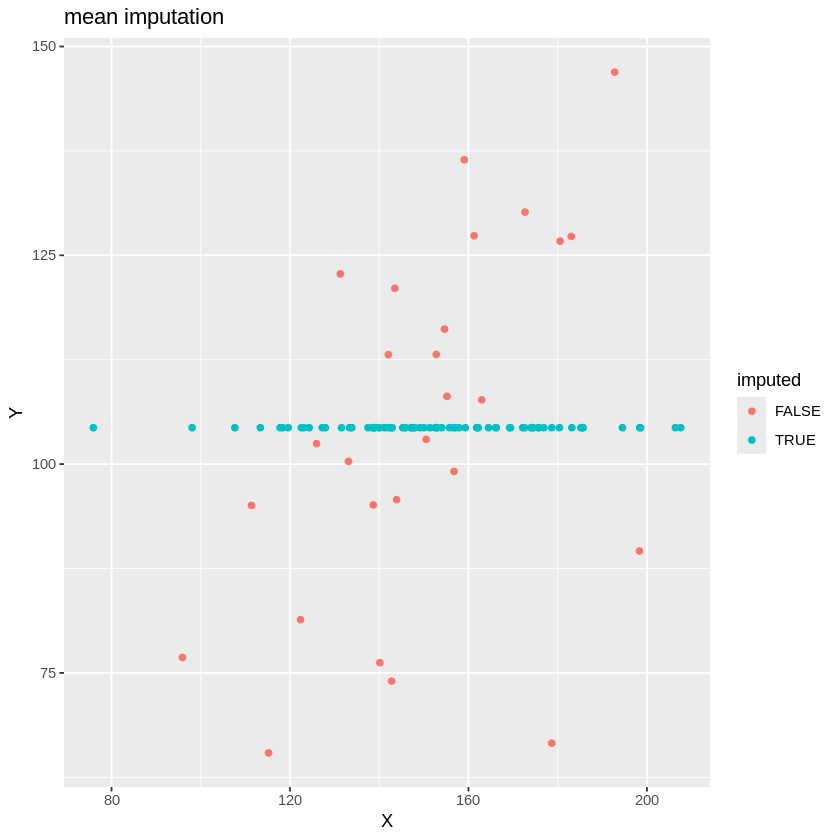

In [ ]:
# Imputation par la moyenne des valeurs manquantes dans notre jeu de données
donMean <- donmiss
donMean[indNA, 2] <- mean(donMean[, 2],na.rm=T)
imputed <- ((1:100)%in%indNA)
ggplot(donMean) + ggtitle("mean imputation") + aes(x=X, y=Y, colour=imputed) + geom_point()

Sur le graphique obtenu, les points  **rouges** montrent les valeurs originales. La ligne horizontale **vertes** au niveau de la moyenne indique que toutes les valeurs manquantes ont été remplacées par cette moyenne, ce qui réduit la **variabilité** de "Y" dans le jeu de données imputé.

Imputation par **régression des valeurs manquantes** dans la colonne Y de notre jeu de données. On prédit $Y$ à partir de $X$, en ajustant un modèle $Y \sim X$.

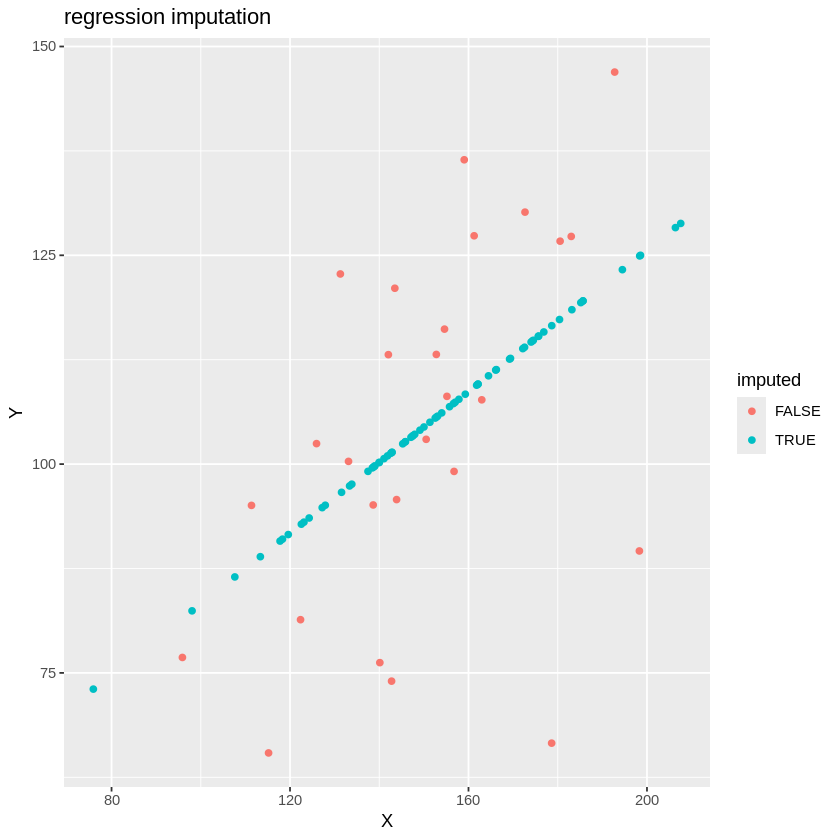

In [ ]:
reg <- lm(Y~X, data = donmiss)
donReg <- donmiss
donReg[indNA, 2] <- predict(reg, donmiss[indNA, 1,drop = F])
ggplot(donReg) + ggtitle("regression imputation") + aes(x=X, y=Y, colour=imputed) + geom_point()

Dans ce graphique, les points en vert représentent les valeurs imputées par régression. Comparé à l'imputation par la moyenne (qui remplaçait toutes les valeurs manquantes par une constante), l'imputation par régression utilise la relation linéaire entre $X$ et
$Y$ pour fournir des valeurs prédictives réalistes. Les valeurs imputées suivent la tendance des données observées, ce qui en fait une approche plus précise que l'imputation par moyenne.

**Imputation par régression stochastique**, qui consiste à ajouter une composante aléatoire aux valeurs prédites par un modèle de régression pour les valeurs manquantes.  Ici, un bruit aléatoire est ajouté aux valeurs prédites, en utilisant la variance de l'erreur de la régression pour refléter la variabilité inhérente des données.

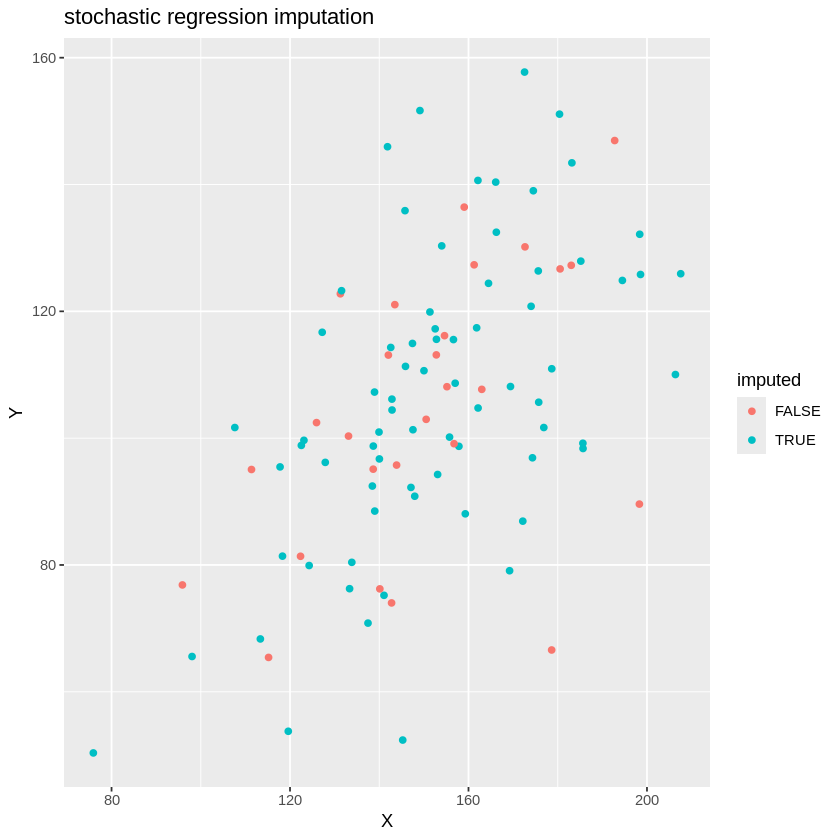

In [ ]:
donStochReg <- donmiss
donStochReg[indNA, 2] <- donReg[indNA, 2] + rnorm(length(indNA), 0, (summary(reg))$sigma)
ggplot(donStochReg) + ggtitle("stochastic regression imputation") + aes(x=X, y=Y, colour=imputed) + geom_point()

Il semble que nous ayons résolu le problème des valeurs manquantes grâce à cette imputation par régression stochastique. Les données imputées ressemblent aux données initiales.  **L'ajout de bruit aux prédictions de régression** permet de mieux simuler la variabilité naturelle des données.

Comparaison des différentes méthodes d'imputation des valeurs manquantes dans la colonne Y en calculant des statistiques (**moyenne, écart type, corrélation, intervalles de confiance**) pour chacune des trois méthodes d'imputation

In [ ]:
res <- cbind.data.frame(donMean[,2], donReg[, 2],  donStochReg[,2])
MM <- apply(res, 2, mean, na.rm = T)
SD <- apply(res, 2, sd, na.rm = T)
COR <- apply(res,2, cor, donmiss[,1])
INF <- MM - qt(.975, n-1) * SD/sqrt(n)
SUP <- MM + qt(.975, n-1) * SD/sqrt(n)
WIDTH <- SUP - INF
INCI <- (125<=SUP)&(125>=INF)
res <-  rbind.data.frame(MM, SD, COR, INF, SUP, WIDTH, INCI)
colnames(res) <-   c("MEAN","REG", "STOCH")
rownames(res) <- c("muhat_y", "sigmahat_y", "cor", "inf", "sup", "width", "coverage")
res

,MEAN,REG,STOCH
,<dbl>,<dbl>,<dbl>
muhat_y,104.360332,105.2885732,105.8893879
sigmahat_y,11.213080,14.4595627,23.0435220
cor,0.244331,0.7331787,0.5384774
inf,102.135414,102.4194822,101.3170532
sup,106.585251,108.1576641,110.4617226
width,4.449837,5.7381819,9.1446694
coverage,0.000000,0.0000000,0.0000000


**La couverture (coverage)**, ici à zéro pour chaque méthode, montre que les intervalles de confiance ne contiennent pas la vraie moyenne (125), indiquant une imprécision dans l'estimation.
**La largeur de l'intervalle** (width) est plus grande avec la **régression stochastique**, reflétant une meilleure incertitude par rapport aux valeurs imputées.

In [ ]:
install.packages("matrixStats")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Le code simule un processus de génération de données manquantes et compare trois méthodes d'imputation **(par la moyenne, par régression et par régression stochastique).**

In [ ]:
# simulation du processus d'imputation de données manquantes en utilisant trois
# méthodes différentes (imputation par la moyenne, régression, et régression stochastique)

# Way 1
SimuMiss <- function(){
# generate data
don <-rmvnorm(n, mean=c(125,125), sigma=matrix(c(625,375,375,625), ncol =2 ) )
colnames(don) <- c("X","Y")
don <- as.data.frame(don)

# generate missing values
donmiss <- don
indNA <- sample(1:n, 0.73*n)
donmiss[indNA, 2] <- NA

donMean <- donReg <- donStochReg <- donmiss

# Mean Imputation
donMean[indNA, 2] <- mean(donMean[, 2], na.rm = T)

# Regression Imputation
reg <- lm(Y~X, data = donmiss)
donReg[indNA, 2] <- predict(reg, donmiss[indNA, 1,drop = F])

# Stochastic Regression Imputation
donStochReg[indNA, 2] <- donReg[indNA, 2] + rnorm(length(indNA), 0, (summary(reg))$sigma)

# Estimating the mean, the variance of Y, and a confidence interval for mu_y
res <- cbind.data.frame(donMean[,2], donReg[, 2],  donStochReg[,2])
MM <- apply(res, 2, mean, na.rm = T)
SD <- apply(res, 2, sd, na.rm = T)
COR <- apply(res,2, cor, donmiss[,1])
INF <- MM - qt(.975, n-1) * SD/sqrt(n)
SUP <- MM + qt(.975, n-1) * SD/sqrt(n)

WIDTH <- SUP - INF
INCI <- (125<=SUP)&(125>=INF)

res <-  rbind.data.frame(MM, SD, COR, INF, SUP, WIDTH, INCI)
colnames(res) <-   c("MEAN","REG", "STOCH")
rownames(res) <- c("theta_y", "sigma_y", "cor", "inf", "sup", "width", "coverage")
return(res)
}

library(matrixStats)
resRepeat <- lapply(1:1000, function(i) SimuMiss())
bias <- colMeans(do.call(rbind, lapply(resRepeat, function(x) x[1,]-125)))
cov <- colMeans(do.call(rbind, lapply(resRepeat, function(x) x[7,])))
avg.width <- colMeans(do.call(rbind, lapply(resRepeat, function(x) x[6,])))
res <- rbind(bias, cov, avg.width)
res

,MEAN,REG,STOCH
bias,-0.1016188,-0.1057402,-0.1146918
cov,0.3790000,0.5810000,0.7210000
avg.width,5.0632823,7.2878967,9.9456676




*   **Biais :** Les valeurs sont proches de zéro, ce qui indique que les méthodes sont relativement précises.
*   **Couverture :** La régression stochastique a la meilleure couverture, reflétant une meilleure estimation de l'incertitude.
*   **Largeur de l'intervalle :** La régression stochastique produit les intervalles les plus larges, montrant une prise en compte de la variabilité due aux valeurs manquantes.

Conclusion, la régression stochastique semble fournir les imputations les plus robustes, avec un bon équilibre entre précision et estimation de la variabilité.




In [ ]:
# simulation d'un processus de génération de données avec des valeurs manquantes (MCAR),
# et application de trois méthodes d'imputation (moyenne, régression,
#  régression stochastique), puis évalue la performance des méthodes
# Way 2
statcheck <- function(don){
 test <- t.test(don[,2])
 muhat <-test$estimate
 corhat <-cor(don[,1],don[,2])
 cov <- 0
 CImu <- if((125<=test$conf.int[2])&(125>=test$conf.int[1])) cov <- 1
 sigmahat <- sd(don[,2])
 widthCI <-test$conf.int[2] -test$conf.int[1]
 return(list(muhat=muhat, sigmahat= sigmahat,  corhat = corhat , cov=cov,  widthCI= widthCI))
}

MCAR <-function(don, percent)
{
  indNA <- sample(1:nrow(don), percent*nrow(don))
  don[indNA, 2] <- NA
  return(don)
}

Impute <-function(don){
don<-as.data.frame(don)
colnames(don)=c("X","Y")
donMean<-donReg<-donStochReg<-don
indNA <- which(is.na(don[,2]))
# Mean Imputation
donMean[indNA, 2] <- mean(don[, 2], na.rm = T)

# Regression Imputation
reg <- lm(Y~X, data = don)
donReg[indNA, 2] <- predict(reg, don[indNA, 1,drop = F])

# Stochastic Regression Imputation
donStochReg[indNA, 2] <- donReg[indNA, 2] + rnorm(length(indNA), 0, (summary(reg))$sigma)
return(list(donMean=donMean, donReg=donReg, donStochReg=donStochReg))
}

# Replicate 1000 times the simulation
n <- 100
res <-replicate(1000, rmvnorm(n, mean=c(125,125), sigma=matrix(c(625,375,375,625), ncol =2 ) )) # replicate function here outputs an array
arraymiss <- apply(res, MARGIN=3, FUN=MCAR, percent=0.73)
aa <-array(arraymiss, dim = c(n, 2, 10))
bb <- apply(aa, 3, Impute)
cc <- lapply(bb, lapply, statcheck)
dd <- lapply(cc, unlist)
RES<- Reduce("+", dd) / length(dd)
RES<-as.data.frame(matrix(RES, 3, 5, byrow=T))
colnames(RES) <- c("muhat", "sigmahat","corhat", "cov_mu", "width_CI_mu")
rownames(RES) <- c("MEAN", "REGRESSION", "REGSTO")
RES

,muhat,sigmahat,corhat,cov_mu,width_CI_mu
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
MEAN,125.0498,12.67619,0.3427530,0.5,5.030461
REGRESSION,125.5942,18.71938,0.8545661,0.8,7.428661
REGSTO,125.8412,23.74628,0.6577893,0.6,9.423554


On aura pratiquement le même commentaire que précedement sur **la moyenne, l'estimation de l'écart-type.**

Pour améliorer, on peut utiliser la régression stochastique, qui semble mieux préserver les caractéristiques de l'ensemble de données d'origine (variance et corrélation). Réduire la proportion de données manquantes (actuellement 73%) peut aussi améliorer la robustesse des estimations.

On génére **les données avec de nouvelles moyennes et covariance**. Ensuite le code ajoute des données manquantes selon les mécanismes MCAR, MAR et MNAR. Egalement 3 méthodes d'imputation son utilisées : imputation par la moyenne, imputation par la regression, régression stochastique.

Le code effectue 10 000 simulations en ajoutant les résultats à des matrices pour chaque méthode d’imputation et chaque mécanisme de données manquantes.

In [ ]:
SimuMiss <- function(method){


# Générer les données avec de nouvelles moyennes et covariance
don <- rmvnorm(n, mean = c(150, 150), sigma = matrix(c(400, 200, 200, 400), ncol = 2))
colnames(don) <- c("X", "Y")
don <- as.data.frame(don)


# generate missing values
donmiss <- don
if (method == "MCAR"){
indNA <- sample(1:n, 0.73*n)
donmiss[indNA, 2] <- NA
}
if (method == "MAR"){
donmiss[donmiss[,1]<=140, 2] <- NA
indNA <- which(is.na(donmiss[,2]))
}
if (method == "MNAR"){
donmiss[donmiss[,2]<=140, 2] <- NA
indNA <- which(is.na(donmiss[, 2]))
}

donMean <- donReg <- donStochReg <- donmiss

# Mean Imputation
donMean[indNA, 2] <- mean(donMean[, 2], na.rm = T)

# Regression Imputation
reg <- lm(Y~X, data = donmiss)
donReg[indNA, 2] <- predict(reg, donmiss[indNA, 1,drop = F])

# Stochastic Regression Imputation
donStochReg[indNA, 2] <- donReg[indNA, 2] + rnorm(length(indNA), 0, (summary(reg))$sigma)

# Estimating the mean, the variance of Y, and a confidence interval for mu_y
res <- cbind.data.frame(donmiss[, 2], donMean[,2], donReg[, 2],  donStochReg[,2])
MM <- apply(res, 2, mean, na.rm = T)
SD <- apply(res, 2, sd, na.rm = T)
INF <- MM - qt(.975, n-1) * SD/sqrt(n)
SUP <- MM + qt(.975, n-1) * SD/sqrt(n)

# Complete case Analysis
INF[1] <- MM[1] - qt(.975, n-(length(indNA))-1) * SD[1]/sqrt(n-(length(indNA))-1)
SUP[1] <- MM[1] + qt(.975, n-(length(indNA))-1) * SD[1]/sqrt(n-(length(indNA))-1)

INCI <- (125<=SUP)&(125>=INF)
WIDTH <- SUP - INF
res = rbind.data.frame(MM, SD, INF, SUP, INCI, WIDTH)
colnames(res) =  c("CA", "MEAN","REG", "STOCH")
return(res)
}
# SimuMiss("MCAR")


MAT <- MAT1 <- MAT2 <- matrix(0, 6, 4)
for (i in 1:10000){
MAT <- MAT + as.matrix(SimuMiss("MCAR"))
MAT1 <- MAT1 + as.matrix(SimuMiss("MAR"))
MAT2 <- MAT2 + as.matrix(SimuMiss("MNAR"))
}
cbind.data.frame(MAT,MAT1,MAT2)/10000


CA,MEAN,REG,STOCH,CA,MEAN,REG,STOCH,CA,MEAN,REG,STOCH
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
149.94653,149.946528,149.965810,149.950451,155.108294,155.10829,150.016894,150.015349,160.193122,160.193122,158.763824,158.767990
19.79771,10.145746,13.410884,19.928437,18.586508,15.41275,17.551855,19.986965,13.899019,11.525360,12.097107,14.059291
141.96563,147.933392,147.304799,145.996217,150.607444,152.05007,146.534225,146.049502,156.827320,157.906241,156.363496,155.978322
157.92743,151.959665,152.626820,153.904686,159.609143,158.16652,153.499562,153.981197,163.558925,162.480004,161.164153,161.557659
0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
15.96180,4.026272,5.322021,7.908468,9.001699,6.11645,6.965338,7.931695,6.731605,4.573763,4.800657,5.579337


Les **méthodes d'imputation influencen**t la précision des estimations. Par exemple, la méthode "Stochastic Regression" présente des écarts-types plus élevés, ce qui reflète une meilleure prise en compte de l'incertitude.

Les **mécanismes MCAR, MAR, et MNAR** affectent la fidélité de chaque méthode. La proportion d'intervalles couvrant la valeur théorique (125) varie, ce qui indique la robustesse ou la sensibilité des méthodes aux types de données manquantes.

**3-Imputation avec une distribution gaussienne conjointe**

On suppose tout d'abord que les données complètes $ X $ suivent une distribution normale multivariée $ \mathcal{N}(\mu, \Sigma) $. Les paramètres $ \mu $ et $ \Sigma $ peuvent être estimés en utilisant des procédures basées sur la vraisemblance maximale pour les modèles de données incomplètes, comme l'algorithme d'Expectation-Maximization (EM).


In [ ]:
install.packages('norm')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Le code utilise le package *norm* en R pour estimer des paramètres de distribution dans des données manquantes, basées sur une distribution normale conjointe. On a remplacé les données donmiss par le dataframe *données* avec une moyenne de 150 pour X et 100 pour Y. Les valeurs manquantes sont introduites de manière aléatoire dans Y.



In [ ]:
# Chargement de la bibliothèque norm
library(norm)

# Création d'un nouveau jeu de données avec valeurs manquantes
set.seed(42)  # Pour la reproductibilité
donnees <- data.frame(
  X = rnorm(100, mean = 150, sd = 20),
  Y = rnorm(100, mean = 100, sd = 15)
)

# Introduire des valeurs manquantes dans la colonne Y
indice_manquant <- sample(1:100, 30)  # 30% de valeurs manquantes
donnees$Y[indice_manquant] <- NA

# Préparation pour l'imputation avec EM
pre <- prelim.norm(as.matrix(donnees))
thetahat <- em.norm(pre)

# Extraction des paramètres estimés
resultat <- getparam.norm(pre, thetahat)
resultat


Iterations of EM: 
1...2...3...4...5...6...7...8...9...


429.43203,-28.80075
-28.80075,207.48982


Après avoir défini une graine aléatoire (rngseed(1e5)) pour garantir la reproductibilité, le code remplace les valeurs manquantes dans Y par des valeurs générées en fonction des estimations obtenues avec EM, de sorte que les valeurs imputées suivent la distribution conjointe.

In [ ]:
# Very important: rngseed MUST be called before using imp.norm
# Imputation multiple en tirant des valeurs pour remplacer les valeurs manquantes dans un jeu de données
rngseed(1e5)
imp.draw <- imp.norm(pre,thetahat,donnees)
imp.draw

X,Y
<dbl>,<dbl>
177.41917,118.01448
138.70604,89.95676
157.26257,96.60456
162.65725,127.72723
158.08537,91.65960
147.87751,101.58271
180.23044,55.49282
148.10682,98.16475
190.36847,90.68658


Le tableau final affiche les données complètes avec les valeurs imputées pour Y là où elles étaient manquantes.

**4-Imputation basée sur l'espérance conditionnelle** pour les valeurs manquantes dans un jeu de données *( "donnee" au lieu de donmiss*), en se basant sur **une distribution normale conjointe dont les paramètres (moyennes et covariances)** ont été estimés à l'aide de l'algorithme EM.

Cet algorithme permet de prédire les valeurs manquantes de manière optimale sous l'hypothèse d'une distribution normale multivariée, en conservant les relations conditionnelles entre les variables.

In [ ]:
to_matrix = function(x, horiz){
  # Helper function that converts to matrix
  # while ensuring that the orientation is the right one if
  # the inpute is just a vector (->column or row matrix)
  if(!is.null(dim(x))){
    return(x)
  }
  else{
    if(!horiz){
      return(as.matrix(x))
    }
    else{
      return(t(as.matrix(x)))
    }
  }
}

estimate.1row = function(row, s, m){
  # Used to perform the imputation on one row
  miss_col = is.na(row)
  nmiss = sum(miss_col)
  if(nmiss>0){
    mu.miss = m[miss_col]
    mu.obs = m[!miss_col]
    sigma.miss = s[miss_col,miss_col]
    sigma.miss.obs = to_matrix(s[miss_col,!miss_col], horiz=nmiss==1)
    sigma.obs = s[!miss_col,!miss_col]
    mu_cond = mu.miss + sigma.miss.obs %*% solve(sigma.obs) %*% (row[!miss_col] - mu.obs)
    row[miss_col] = mu_cond
  }
  return(row)
}


params = getparam.norm(pre,thetahat)
sigma = params$sigma
mu = params$mu
imp.expectation = t(apply(donnees, 1, function(x){estimate.1row(x,s=sigma, m=mu)}))

##5- **Multiple imputation**



Ce code réalise une **imputation multiple** pour gérer les valeurs manquantes dans le jeu de données donnees, en utilisant trois méthodes de génération de données manquantes : **MCAR** (Missing Completely At Random), **MAR** (Missing At Random), et **MNAR** (Missing Not At Random).

On continue avec notre jeu de données "*donnee*".

In [ ]:
IMPMULT <- function(method, M){
  # Génération des données
  donnees <- data.frame(
    X = rnorm(100, mean = 150, sd = 20),
    Y = rnorm(100, mean = 100, sd = 15)
  )

  # Générer les valeurs manquantes
  if (method == "MCAR"){
    indNA <- sample(1:100, 0.73 * 100)
    donnees[indNA, "Y"] <- NA
  }
  if (method == "MAR"){
    donnees[donnees$X <= 140, "Y"] <- NA
    indNA <- which(is.na(donnees$Y))
  }
  if (method == "MNAR"){
    donnees[donnees$Y <= 100, "Y"] <- NA
    indNA <- which(is.na(donnees$Y))
  }

  # Imputation multiple
  ThetaHat <- VarThetaHat <- rep(NA, M)
  for (j in 1:M){
    donStochReg <- donnees
    # Bootstrap pour refléter la variabilité d'échantillonnage
    indsample <- sample(1:100, replace = TRUE)
    reg <- lm(Y ~ X, data = donnees[indsample, ])
    donStochReg[indNA, "Y"] <- predict(reg, donnees[indNA, "X", drop = FALSE]) + rnorm(length(indNA), 0, (summary(reg))$sigma)
    ThetaHat[j] <- mean(donStochReg$Y, na.rm = TRUE)
    VarThetaHat[j] <- var(donStochReg$Y, na.rm = TRUE) / 100
  }

  # Combinaison des résultats selon les règles de Rubin
  ThetaHatBar <- mean(ThetaHat)
  T <- mean(VarThetaHat) + (1 + 1/M) * var(ThetaHat)

  IMddf <- (M-1) * (1 + mean(VarThetaHat) / ((M+1) * var(ThetaHat)))^2

  IMINF <- ThetaHatBar - qt(0.975, df = IMddf) * sqrt(T)
  IMSUP <- ThetaHatBar + qt(0.975, df = IMddf) * sqrt(T)

  IMINCI <- (125 <= IMSUP) & (125 >= IMINF)
  IMWIDTH <- IMSUP - IMINF
  res <- rbind.data.frame(ThetaHatBar, IMINF, IMSUP, IMINCI, IMWIDTH)
  colnames(res) <- c("IM")
  return(res)
}

# Exemple d'exécution
IMPMULT("MCAR", M = 100)


IM
<dbl>
101.72678
95.76430
107.68926
0.00000
11.92496


L'absence de couverture (IMINCI = 0) montre que la moyenne cible (125) n'est pas incluse dans l'intervalle, ce qui peut indiquer un biais dû à la méthode d'imputation ou aux hypothèses faites sur les valeurs manquantes.

## **En résumé :**
*   **L'imputation unique** sous-estime la variabilité des estimateurs des paramètres, car elle ne prend pas en compte la variabilité due aux valeurs manquantes. **L'imputation multiple** vise à fournir une estimation des paramètres d'intérêt ainsi que de leur variabilité, en intégrant la variabilité induite par les valeurs manquantes.
*   **Le pourcentage de valeurs manquantes** n’est pas le seul facteur important. Si les **variables sont fortement corrélées**, il est possible de prédire les valeurs manquantes avec précision, même avec un pourcentage élevé de données manquantes. En revanche, si **l’ensemble de données est très bruité**, même un faible pourcentage de valeurs manquantes peut poser problème. **L’imputation multiple** peut toujours être réalisée et permet de mesurer précisément la **variabilité des prédictions**, ce qui indique à quel point on peut faire confiance aux résultats obtenus d’un ensemble de données (très) incomplet.
*  Lorsque l'on a **3 méthodes d'imputation** à comparer : on peut utiliser une stratégie de validation croisée : on supprime certaines entrées disponibles, on les prédit avec les 3 méthodes d'imputation et on calcul les erreurs de prédiction. On répète cette procédure, disons, K fois. On choisis ensuite la **méthode qui minimise l'erreur de prédiction**.
*   **La différence entre l'imputation avec Random Forest et l'ACP:** La qualité de l’imputation dépend des propriétés du modèle d'imputation. Avec **l'imputation par ACP**, on s'attend à mieux représenter les relations **linéaires entre les variables**, tandis que l'imputation par **forêts aléatoires** sera plus efficace pour capturer **les interactions fortes et les relations non linéaires entre variables.** Cependant, les forêts aléatoires ne pourront pas interpoler, c’est-à-dire prédire au-delà des limites observées, puisqu’elles se basent sur des moyennes.


